# SQL Database with Python

## import sqlite3

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
print("All required packages are imported successfully !")

All required packages are imported successfully !


## Create connection to SQLite Database file
> when you mention a database file name in the connection statement, sqlite3 checks if such a database is already present or not. And if it is not present, the new database file is created ⚡️. So, the same connection statement can be used to connect to the existing database and to create the new database file.

In [2]:
#It is good practice to assign the file name to the variable.
# File Format : *.sqlite, *.db, *.db3, and *.sqlite3

housing_db = 'housing.db' 
conn1 = sqlite3.connect(housing_db)

## Create the Cursor
> The cursor is the object, which will be used to execute the SQL statements on this database

In [3]:
cur1 = conn1.cursor()

## Create the Table
1. **cur.execute() :** To execute SQL statement mentioned within ()
2. **conn.commit() :** To perform the current transaction. If this method is not called, anything that has done since the last call to commit() is not visible from other database connections.

In [4]:
drop_table_query = "DROP TABLE IF EXISTS housing_tab"
cur1.execute(drop_table_query)
conn1.commit()

In [5]:
COL1 = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [6]:
create_table_query = "CREATE TABLE IF NOT EXISTS housing_tab(\
                        CRIM REAL, ZN REAL,\
                        INDUS REAL, CHAS REAL,\
                        NOX REAL, RM REAL,\
                        AGE REAL, DIS REAL,\
                        RAD INTEGER, TAX INTEGER,\
                        PTRATIO REAL, B REAL,\
                        LSTAT REAL, MEDV REAL)"
cur1.execute(create_table_query)
conn1.commit()

In [7]:
check_table_cols = "SELECT * FROM housing_tab"
cur1.execute(check_table_cols)
col_name_list = [tuple[0] for tuple in cur1.description]
#col_name_list
print(', '.join(map(repr, col_name_list)))

'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'


## Read the data from the Excel File

In [8]:
df = pd.read_csv("bostonHousing.csv") 
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


<AxesSubplot:>

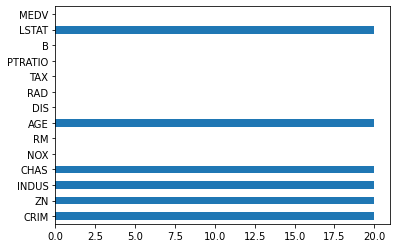

In [9]:
df.isna().sum().plot(kind='barh')

In [10]:
df.dropna(inplace=True) # remove the rows containing these null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [11]:
# Let’s also change the datatype of all float64 columns to int64. Just follow me on the below code.
'''
for col in COL1:
    df[col] = df[col].astype("int64")
df.info()
'''

'\nfor col in COL1:\n    df[col] = df[col].astype("int64")\ndf.info()\n'

In [12]:
subdf = df [COL1]
subdf.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7


## Load the Data in SQLite Database
1. Name of the table which you already created
2. Connection object conn which connects to the database

In [14]:
subdf.to_sql('housing_tab', conn1, if_exists="append", index=False)
print("Data Successfully exported !")

Data Successfully exported !


In [20]:
query = "SELECT * FROM housing_tab WHERE RM > 3"
query1 = "SELECT MIN(RM) AS Max_RM, MAX(RM) AS Min_RM  FROM housing_tab"
query2 = "SELECT *  FROM housing_tab WHERE CRIM BETWEEN 10 AND 20"
cur1.execute(query1)
conn1.commit()
result = cur1.fetchall()
resultdf = pd.DataFrame(result)
resultdf.columns = [tuple[0] for tuple in cur1.description]
resultdf.head()

,Max_RM,Min_RM
0,3.561,8.78


## Close Connection

In [21]:
conn1.close()

#### You can not work with the database once the connection is close, you will get an error message :
> ProgrammingError: Cannot operate on a closed database.

In [23]:
query = "SELECT * FROM housing_tab WHERE RM > 3"
query1 = "SELECT MIN(RM) AS Max_RM, MAX(RM) AS Min_RM  FROM housing_tab"
query2 = "SELECT *  FROM housing_tab WHERE CRIM BETWEEN 10 AND 20"
cur1.execute(query1)
conn1.commit()
result = cur1.fetchall()
resultdf = pd.DataFrame(result)
resultdf.columns = [tuple[0] for tuple in cur1.description]
resultdf.head()

ProgrammingError: Cannot operate on a closed database.